# Create a convolutional neural network (CNN)
model = tf.keras.quential([
    Cotf.keras.layers.nv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    Matf.keras.layers.xPooling2D(2, 2),
    Cotf.keras.layers.nv2D(64, (3, 3), activation='relu'),
    Matf.keras.layers.xPooling2D(2, 2),
    Cotf.keras.layers.nv2D(128, (3, 3), activation='relu'),
    Matf.keras.layers.xPooling2D(2, 2),
    Fltf.keras.layers.atten(),
    Detf.keras.layers.nse(128, activation='relu'),
    Detf.keras.layers.nse(len(clothing_names), activation='softmax')
])tf

In [1]:
#----------------------------IMPORTS----------------------------
import cv2
import numpy as np
import os
import random
import pickle
import tensorflow as tf
import pandas as pd
import skimage.io as io
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [2]:
path = 'D:\Senior II\Graduation Project\Datasets\Clothes\Dataset_1'
df = pd.read_csv(path + '/images.csv')
df.head()

,image,sender_id,label,kids
0,4285fab0-751a-4b74-8e9b-43af05deee22,124,Not sure,False
1,ea7b6656-3f84-4eb3-9099-23e623fc1018,148,T-Shirt,False
2,00627a3f-0477-401c-95eb-92642cbe078d,94,Not sure,False
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,43,T-Shirt,False
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,189,Shoes,False


In [3]:
#Remove all entries with label = Not sure
df = df[df['label'] != 'Not sure']
#Remove colums: sender_id and kids
df = df.drop(['sender_id', 'kids'], axis=1)
df.head()

,image,label
1,ea7b6656-3f84-4eb3-9099-23e623fc1018,T-Shirt
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,T-Shirt
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,Shoes
5,5d3a1404-697f-479f-9090-c1ecd0413d27,Shorts
6,b0c03127-9dfb-4573-8934-1958396937bf,Shirt


In [4]:
#Extract the unique labels
class_names = df['label'].unique()
print(f'There are {class_names.shape[0]} unique classes')
class_ids = dict()
for i in range(len(class_names)):
    class_ids[class_names[i]] = i

There are 19 unique classes


In [13]:
image_width = image_height = 90

In [15]:
#Upload photos to a numpy array
images_train = []
images_labels_train = []
images_test = []
images_labels_test = []
# for i in range(len(df['image'])):
for i in range(1000):
    #Check if df['image'][i] is in
    if (i in df['image'].keys()):
        img = cv2.imread(path + '/' + df['image'][i] + '.jpg')
        #Check if image is not None
        if (img is not None):
            images_train.append(cv2.resize(img, (image_width, image_height)))
            images_labels_train.append(class_ids[df['label'][i]])

for j in range(300):
    #Check if df['image'][i] is in
    if ((i + j) in df['image'].keys()):
        img = cv2.imread(path + '/' + df['image'][i + j] + '.jpg')
        #Check if image is not None
        if (img is not None):
            images_test.append(cv2.resize(img, (image_width, image_height)))
            images_labels_test.append(class_ids[df['label'][i + j]])

            
x_train = np.array(images_train).astype(float)
y_train = np.array(images_labels_train)

x_test = np.array(images_test).astype(float)
y_test = np.array(images_labels_test)

This image is of a Shorts


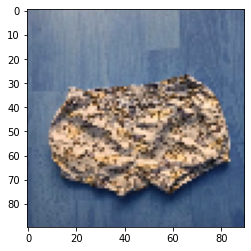

In [19]:
#Show an image from x_train
index = 562
plt.imshow(x_train[index].astype(np.uint8))
print(f'This image is of a {class_names[y_train[index]]}')
plt.show()

In [20]:
#Number of training examples
m = x_train.shape[0]
m_test = x_test.shape[0]

#Reshape the training and test examples
# x_train = x_train.reshape(m, -1)
# x_test = x_test.reshape(m_test, -1)

print(f'x_train.shape = {x_train.shape}')
print(f'y_train.shape = {y_train.shape}')
print(f'x_test.shape = {x_test.shape}')
print(f'y_test.shape = {y_test.shape}')

x_train.shape = (961, 90, 90, 3)
y_train.shape = (961,)
x_test.shape = (295, 90, 90, 3)
y_test.shape = (295,)


In [ ]:
# #Normalize image vectors
# x_train /= 255
# x_test /= 255

In [21]:
print(np.max(x_train))

255.0


In [39]:
# Create a convolutional neural network (CNN)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape = (image_height, image_height, 3), name = 'Conv1'),
    tf.keras.layers.MaxPooling2D(2, 2, name = 'Max1'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', name = 'Conv2'),
    tf.keras.layers.MaxPooling2D(2, 2, name = 'Max2'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', name = 'Conv3'),
    tf.keras.layers.MaxPooling2D(2, 2, name = 'Max3'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), name = 'Dense1'),
    tf.keras.layers.Dense(len(class_names), activation='linear', name = 'Dense2')
])

# Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [40]:
# Train the model on the training data
# history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))
history = model.fit(x_train[:650], y_train[0:650], epochs=11, batch_size=16)

Epoch 1/11
21/21 [==============================] - 4s 131ms/step - loss: 38.6268 - accuracy: 0.1538
Epoch 2/11
21/21 [==============================] - 3s 133ms/step - loss: 4.3726 - accuracy: 0.2877
Epoch 3/11
21/21 [==============================] - 3s 132ms/step - loss: 4.0322 - accuracy: 0.3323
Epoch 4/11
21/21 [==============================] - 3s 124ms/step - loss: 3.5891 - accuracy: 0.4415
Epoch 5/11
21/21 [==============================] - 3s 121ms/step - loss: 3.0974 - accuracy: 0.5738
Epoch 6/11
21/21 [==============================] - 3s 126ms/step - loss: 2.6845 - accuracy: 0.6708
Epoch 7/11
21/21 [==============================] - 3s 129ms/step - loss: 2.3341 - accuracy: 0.7754
Epoch 8/11
21/21 [==============================] - 3s 124ms/step - loss: 2.1243 - accuracy: 0.8077
Epoch 9/11
21/21 [==============================] - 3s 123ms/step - loss: 1.9921 - accuracy: 0.8569
Epoch 10/11
21/21 [==============================] - 3s 123ms/step - loss: 1.8147 - accuracy: 0.884

In [41]:
_, train_accuracy = model.evaluate(x_train, y_train)
_, test_accuracy = model.evaluate(x_test, y_test)
print("Train Accuracy = %.2f" % (train_accuracy*100),'% with', m, 'training examples')
print("Test Accuracy = %.2f" % (test_accuracy*100),'% with', m_test, 'test examples')

10/10 [==============================] - 0s 32ms/step - loss: 5.3413 - accuracy: 0.3932
Train Accuracy = 71.80 % with 961 training examples
Test Accuracy = 39.32 % with 295 test examples


In [42]:
_, train_accuracy = model.evaluate(x_train, y_train)
_, test_accuracy = model.evaluate(x_test, y_test)
print("Train Accuracy = %.2f" % (train_accuracy*100),'% with', m, 'training examples')
print("Test Accuracy = %.2f" % (test_accuracy*100),'% with', m_test, 'test examples')

10/10 [==============================] - 0s 27ms/step - loss: 5.3413 - accuracy: 0.3932
Train Accuracy = 71.80 % with 961 training examples
Test Accuracy = 39.32 % with 295 test examples


In [43]:
#Delete previous model
del model

In [ ]:
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)
train_count_correct = 0
test_count_correct = 0
for i in range(m):
    predicted = np.argmax(train_predictions[i])
    if (predicted == y_train[i]):
        train_count_correct += 1
train_accuracy = train_count_correct / m

for i in range(m_test):
    predicted = np.argmax(test_predictions[i])
    if (predicted == y_test[i]):
        test_count_correct += 1
test_accuracy = test_count_correct / m_test

print("Train Accuracy = %.2f" % (train_accuracy*100),'% with', m, 'training examples')
print("Test Accuracy = %.2f" % (test_accuracy*100),'% with', m_test, 'test examples')


In [ ]:
prediction = model.predict(x_train[np.newaxis,0])
prediction
class_names[np.argmax(prediction)]

In [ ]:
#Plot loss vs epochs
plt.plot(history.history['loss'])
plt.show()

In [ ]:
# Save the trained model
pickle.dump(model, open('clothing_detector.pkl', 'wb'))

In [ ]:
# Plot a summary of your model's architecture
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
model.summary()

In [ ]:
#Delete previous model
del model